In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Javascript, display

In [39]:
Initial_state = widgets.Dropdown(
                options=[('F5',2029), ('F4',3275),('F3',4325),('F2',5035),('F1',5516),('F0',5800),('D4',20498)],
                description='Initial_state:',
                )
Final_state = widgets.Dropdown(
                options=[('F6',0), ('F5',2029), ('F4',3275),('F3',4325),('F2',5035),('F1',5516),('F0',5800),('D4',20498)],
                description='Final_state:',
                )

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Calculate energy difference and find spectral position",
                       layout=widgets.Layout(width='350px', height='30px'))
button.on_click(run_all)

The following code can be used to calculate the energy difference between two electronic states of terbium$^{3+}$, which can help in interpreting a spectrum and assigning the correct transitions. Use the drag and drop menu to select an initial state (e.g. F0) and a final state (e.g. F6), which corresponds to the transition F$_0$ $\rightarrow$ F$_6$. Press the button that says 'Calculate energy difference and find spectral position' underneath to run the code. This calculates the energy difference between the two states, and a figure displaying the spectral position is displayed. 

In [51]:
display(Initial_state)
display(Final_state)
display(button)

<IPython.core.display.Javascript object>

Dropdown(description='Initial_state:', index=6, options=(('F5', 2029), ('F4', 3275), ('F3', 4325), ('F2', 5035…

Dropdown(description='Final_state:', options=(('F6', 0), ('F5', 2029), ('F4', 3275), ('F3', 4325), ('F2', 5035…

Button(description='Calculate energy difference and find spectral position', layout=Layout(height='30px', widt…

There are 20498 cm^-1 between D4 and F6.
This corresponds to 488.0 nm.




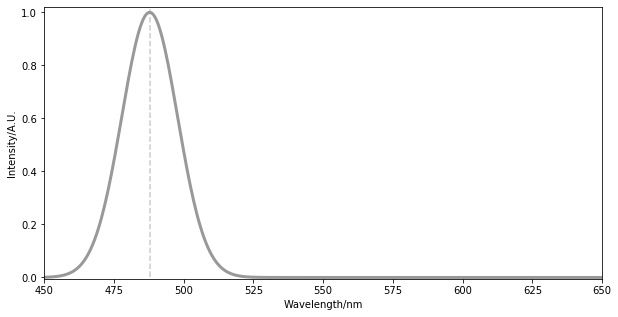

In [52]:
difference_cm = Initial_state.value - Final_state.value
difference_nm = 10**7/difference_cm

print(f'There are {difference_cm} cm^-1 between {Initial_state.label} and {Final_state.label}.')
print(f'This corresponds to {np.round(difference_nm,0)} nm.\n\n')


x = np.linspace(300,900,1000)
b = difference_nm
a = 1
c = 10
f1 = a * np.exp(-(x-b)**2/(2*c**2))
plt.figure(figsize = [10,5])
plt.plot([b, b],[0, 2], '--', color = [0.8, 0.8, 0.8])
plt.plot(x,f1, linewidth = 3, color = [0.6,0.6,0.6])
plt.xlabel('Wavelength/nm')
plt.ylabel('Intensity/A.U.')
plt.xlim([450,650])
plt.ylim([-0.005,1.02])
plt.show()